# Project 1

## Part A

### 0) We ask you to create a folder for you project, in which you will be working on the project. You will be asked to send us this project that we can look at your progress and browse through your work. Please follow the instructions in the seminar or a documentation of julia about the activation of an environment and use it for your project. (It can be found also here: https://pkgdocs.julialang.org/v1/environments/ even it is from prompt/terminal, in a notebook use `Pkg.activate(".")`) 
* In your project, you will be adding packages, using them, you can create a script files as well and load them (with helper functions if needed.)

In [667]:
using Pkg
Pkg.activate(".")

  Activating project at `~/Documents/fin_econometrics_2/project1`


In [668]:
Pkg.instantiate()
Pkg.status()

Status `~/Documents/fin_econometrics_2/project1/Project.toml`
  [6d3278bc] ARCHModels v2.3.4
  [fbb218c0] BSON v0.3.7
  [ad839575] Blink v0.12.8
  [336ed68f] CSV v0.10.11
  [a93c6f00] DataFrames v1.6.1
⌃ [1313f7d8] DataFramesMeta v0.14.0
⌃ [31c24e10] Distributions v0.25.102
  [587475ba] Flux v0.14.6
⌃ [38e38edf] GLM v1.8.3
  [c601a237] Interact v0.10.5
  [945b72a4] MarketData v0.13.12
  [429524aa] Optim v1.7.8
  [91a5bcdd] Plots v1.39.0
  [ce6b1742] RDatasets v0.7.7
  [b0e4dd01] RollingFunctions v0.8.0
⌅ [2913bbd2] StatsBase v0.33.21
  [f3b207a7] StatsPlots v0.15.6
  [bd369af6] Tables v1.11.1
  [9e3dc215] TimeSeries v0.23.2
  [e88e6eb3] Zygote v0.6.67
  [37e2e46d] LinearAlgebra
  [10745b16] Statistics v1.9.0
Info Packages marked with ⌃ and ⌅ have new versions available, but those with ⌅ are restricted by compatibility constraints from upgrading. To see why use `status --outdated`


In [445]:
include("project_functions.jl")

trainW4 (generic function with 1 method)

### 1) Use package `MarketData`, `Quandl`, or different one, if needed go to their github pages and `docs`, then **download data for an asset** of your choice.

In [669]:
using MarketData, Dates

We will load daily data of the Pfizer stock as it ought to be interesting to study volatility of a company which presumably was influenced greatly by the COVID19 virus.

In [739]:
PFE = yahoo("PFE", YahooOpt(period1 = DateTime(2010, 1, 1), period2 = now()))

3494×6 TimeArray{Float64, 2, Date, Matrix{Float64}} 2010-01-04 to 2023-11-17
│            │ Open    │ High    │ Low     │ Close   │ AdjClose │ Volume      │
├────────────┼─────────┼─────────┼─────────┼─────────┼──────────┼─────────────┤
│ 2010-01-04 │ 17.334  │ 17.9696 │ 17.3055 │ 17.9602 │ 10.6451  │ 5.4898644e7 │
│ 2010-01-05 │ 17.9507 │ 17.9602 │ 17.5996 │ 17.704  │ 10.4932  │ 4.5714931e7 │
│ 2010-01-06 │ 17.704  │ 17.8463 │ 17.5617 │ 17.6471 │ 10.4595  │ 4.3640975e7 │
│ 2010-01-07 │ 17.685  │ 17.7135 │ 17.5142 │ 17.5806 │ 10.4201  │ 4.1557112e7 │
│ 2010-01-08 │ 17.666  │ 17.7514 │ 17.5712 │ 17.723  │ 10.5045  │ 3.2049716e7 │
│ 2010-01-11 │ 17.8653 │ 17.9791 │ 17.7135 │ 17.8653 │ 10.5888  │ 3.4199665e7 │
│ 2010-01-12 │ 17.8368 │ 18.0171 │ 17.685  │ 17.8084 │ 10.5551  │ 4.3501847e7 │
│ 2010-01-13 │ 17.9032 │ 18.3112 │ 17.9032 │ 18.2258 │ 10.8025  │ 6.2728072e7 │
│ ⋮          │ ⋮       │ ⋮       │ ⋮       │ ⋮       │ ⋮        │ ⋮           │
│ 2023-11-09 │ 30.49   │ 30.51   │ 29.63   

### 2) Use plot to look at the data, do some summary statistics, `Statistics`, `DataFrames`, `StatsPlots` packages


In [740]:
using Statistics, DataFrames, StatsPlots, TimeSeries, KernelDensity, RollingFunctions

PLease note in the underneath transformations that both realized variance and realized volatility is considered. Namely, literature illustrates the usage of both with regards to HAR estimation as well as HAR forecasting.

Where Realized Variance can be denoted as:

$$ RV = \sum_{i=1}^n(r_i)^2  $$

And Realized Volatility as:

$$ RV = \sqrt{\sum_{i=1}^n(r_i)^2} $$

$r_i$ is the log return at time $i$, and $n$ is the number of observations.

In [741]:
df = DataFrame(PFE)
df = @transform(df, :ln_returns = [NaN; diff(log.(:AdjClose))]) #logarithmic returns of the closing price
df = @transform(df, :r_var = running(sum,:ln_returns .^2, 20)) #rolling sum of squared returns over a window of 20 observations
df = @transform(df, :r_vol = sqrt.(:r_var)) #Realized Volatility, square root of rolling variance
df = df[31:end,:]
first(df, 5)

5×10 DataFrame
 Row │ timestamp   Open     High     Low      Close    AdjClose  Volume     ln ⋯
     │ Date        Float64  Float64  Float64  Float64  Float64   Float64    Fl ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2010-02-17  16.9355  16.945   16.6319  16.7647   10.0304  6.13998e7  -0 ⋯
   2 │ 2010-02-18  16.7742  16.8406  16.6509  16.8216   10.0644  6.02029e7   0
   3 │ 2010-02-19  16.907   17.1727  16.8216  17.0683   10.212   5.33933e7   0
   4 │ 2010-02-22  17.0588  17.2201  16.8691  17.0304   10.1893  6.1134e7   -0
   5 │ 2010-02-23  16.926   17.0209  16.7078  16.7647   10.0304  5.04584e7  -0 ⋯
                                                               3 columns omitted

In [742]:
stats = describe(df, :detailed)
println(stats)

10×11 DataFrame
 Row │ variable    mean        std         min          q25          median      q75         max         nunique  nmissing  eltype   
     │ Symbol      Union…      Union…      Any          Union…       Any         Union…      Any         Union…   Int64     DataType 
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ timestamp                           2010-02-17                2017-01-01              2023-11-17  3464            0  Date
   2 │ Open        32.0736     9.24846     13.4915      27.2747      32.2581     36.9751     60.6                        0  Float64
   3 │ High        32.3633     9.37173     13.5958      27.4739      32.4953     37.2445     61.71                       0  Float64
   4 │ Low         31.7837     9.12441     13.2827      27.1063      32.0256     36.6        59.83                       0  Float64
   5 │ Close       32.0754     9.25234     13.4156      2

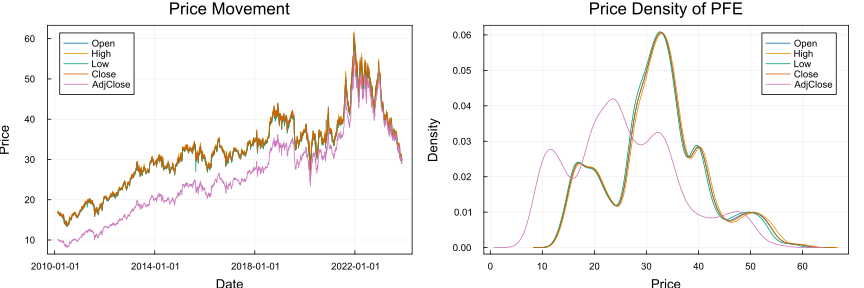

In [743]:
pl1 = plot(df.timestamp,df.Open, label="Open")
pl1 = plot!(df.timestamp,df.High, label="High")
pl1 = plot!(df.timestamp,df.Low, label="Low")
pl1 = plot!(df.timestamp,df.Close, label="Close")
pl1 = plot!(df.timestamp,df.AdjClose, label="AdjClose")
pl1 = plot!(legend=:topleft, xlabel="Date", ylabel="Price", title = "Price Movement")
pl2 = density(df.Open, label="Open")
pl2 = density!(df.High, label="High")
pl2 = density!(df.Low, label="Low")
pl2 = density!(df.Close, label="Close")
pl2 = density!(df.AdjClose, label="AdjClose")
pl2 = plot!(legend=:topright, xlabel="Price", ylabel="Density", title = "Price Density of PFE")
plot(pl1, pl2, size=(1200,400))

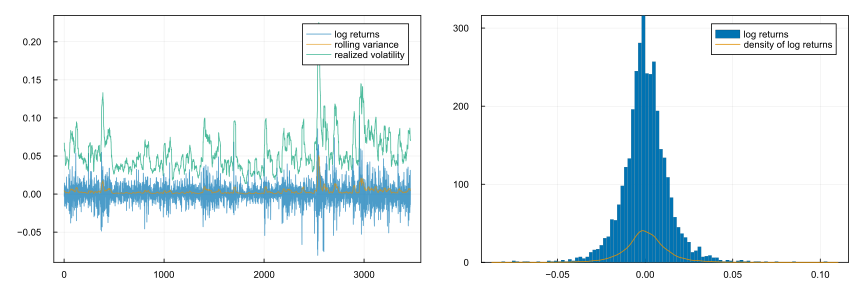

In [744]:
p1 = plot(df.ln_returns, line=(1., 0.7, :solid), label="log returns", palette=:seaborn_colorblind, size=(1000,400))
p1 = plot!(df.r_var, line=(1., 0.7, :solid), label="rolling variance", framestyle=:box)
p1 = plot!(df.r_vol, line=(1., 0.7, :solid), label="realized volatility", framestyle=:box)
p2 = histogram(df.ln_returns, l=0, framestyle=:box, label = "log returns")
p2 = density!(df.ln_returns, label="density of log returns")

plot(p1, p2, size=(1200,400))

In [745]:
size(df.r_vol)

(3464,)

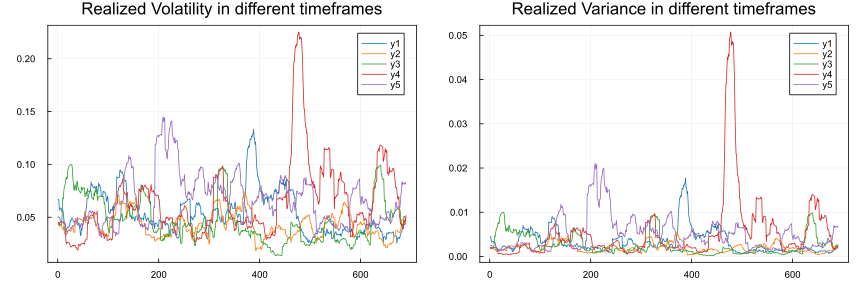

In [764]:
# empty array
subsample_r_vol = []
# loop
for t in 1:690:3450
    push!(subsample_r_vol, df.r_vol[t:t+690-1]) # this pushes = adds plot p0 into the array to store it
end
pl3 = plot(subsample_r_vol, size=(1000,500), framestyle=:box, palette=:tab10, title = "Realized Volatility in different timeframes")
# empty array
subsample_r_var = []
# loop
for t in 1:690:3450
    push!(subsample_r_var, df.r_var[t:t+690-1]) # this pushes = adds plot p0 into the array to store it
end
pl4 = plot(subsample_r_var, size=(1000,500), framestyle=:box, palette=:tab10, title = "Realized Variance in different timeframes")
plot(pl3, pl4, size=(1200,400))

### 3) Use `ARCHModels.jl` to **model** asset data and **forecast**.

#### GARCH

Univariate GARCH (p, q) model:

$\sigma_t^2 = \omega + \sum_{i=1}^p \alpha_i \epsilon_{t-1}^2 + \sum_{i=1}^q \beta_i \sigma_{t-i}^2$

In [747]:
using ARCHModels

Let us select the GARCH model based on the AIC criteria:

In [748]:
candidate_p = [1,2,3]
candidate_q = [1,2,3]

best_aic = Inf
garch_fit = nothing

for p in candidate_p
    for q in candidate_q
        model = fit(GARCH{p, q}, df.ln_returns)
        aic = StatsBase.aic(model) 
                
        if aic < best_aic
            best_aic = aic
            garch_fit = model
        end
    end
end

garch_fit


GARCH{1, 1} model with Gaussian errors, T=3464.

Mean equation parameters:
──────────────────────────────────────────────
      Estimate    Std.Error  z value  Pr(>|z|)
──────────────────────────────────────────────
μ  0.000558831  0.000192335  2.90551    0.0037
──────────────────────────────────────────────

Volatility parameters:
──────────────────────────────────────────────
      Estimate   Std.Error   z value  Pr(>|z|)
──────────────────────────────────────────────
ω   6.37836e-6  2.27763e-6   2.80044    0.0051
β₁  0.849219    0.0334687   25.3736     <1e-99
α₁  0.119501    0.0265424    4.50226    <1e-05
──────────────────────────────────────────────


In our case, the GARCH(1,1) seems to be the best based on the information criteria. Hence, I will predict the conditional variances for the next three time steps based on the GARCH(1,1).

In [749]:
forecasted_variances = predict.(garch_fit, :return, 1:3)

3-element Vector{Float64}:
 0.0005588314353868339
 0.0005588314353868339
 0.0005588314353868339

Differently, we can compare how well the predictions perform performing backtesting methods:

In [775]:
T = length(df.ln_returns);
windowsize = 1000;
vol = similar(df.ln_returns);
for t = windowsize+1:T-1
    m = fit(GARCH{1, 1}, df.ln_returns[t-windowsize:t]);
    vol[t+1] = predict(m, :volatility; level=0.05);
end
DQTest(df.ln_returns[windowsize+1:end], vol[windowsize+1:end], 0.05)

Engle and Manganelli's (2004) DQ test (out of sample)
-----------------------------------------------------
Population details:
    parameter of interest:   Wald statistic in auxiliary regression
    value under h_0:         0
    point estimate:          331.405

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-70

Details:
    sample size:                    2464
    number of lags:                 1
    VaR level:                      0.05
    DQ statistic:                   331.405


### 4) **Plot** forecasts.


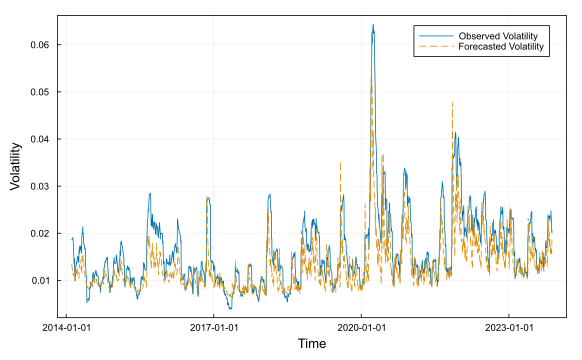

In [806]:
plot(df.timestamp[1005:T], df.r_vol[1005:end]/3.5, label="Observed Volatility", ylabel="Volatility", xlabel="Time")
plot!(df.timestamp[1005:T], vol[1005:end], label="Forecasted Volatility", linestyle=:dash)

Note, the model is trained or estimated on the first 1000 observations and then predicted for the remainder of the observed values. In our case, only observations 1005:length(df.ln_returns) is illustrated in the graph. In addition, there is a shift with our calculated realized volatility (r_vol), potentially due to difference in calculation but if we divide our r_vol by 3.5 to align the prediction with our observations we see a seemingly accurate prediction.

## Part B

- *OLS* vs *ML* estimation HAR
    - Estimate coefficients with different approaches
    - Optim.jl vs Flux.jl
    - Discuss coefficients, show them in scatter, histograms
    - test different activations in NN
    - play around with regularizations
    - Make Q-Q plots, a table of performance

#### HAR

Let us first consider the HAR model:
$$  $$

Calculating daily, weekly and monthly Realized Volatilities:

In [491]:
HAR_regressors(df.rv)

1429×3 Matrix{Float64}:
 0.0482018  0.0499451  0.0779071
 0.0473428  0.0490958  0.0756935
 0.0468346  0.0485333  0.0734122
 0.046343   0.0477621  0.0710546
 0.0499501  0.0477344  0.06885
 0.0573562  0.0495653  0.0669728
 0.0550256  0.0511019  0.0649917
 0.0544696  0.0526289  0.0629524
 0.053435   0.0540473  0.0612656
 0.0502664  0.0541106  0.0594194
 ⋮                     
 0.0822953  0.0808596  0.0750682
 0.0823209  0.081079   0.0760744
 0.0834591  0.0819068  0.077162
 0.0867335  0.0834182  0.0784128
 0.0833533  0.0836324  0.0795102
 0.0773366  0.0826407  0.080323
 0.0763233  0.0814411  0.0808641
 0.0711265  0.0789746  0.0808043
 0.0721515  0.0760582  0.0807471

##### OLS Estimator

$X′X\beta=X′y$

In [603]:
using GLM

In [604]:
data_har = DataFrame([df.rv[23:end] HAR_regressors(df.rv)], [:rv_t, :rv_d, :rv_w, :rv_m]);
first(data_har,5)

5×4 DataFrame
 Row │ rv_t       rv_d       rv_w       rv_m      
     │ Float64    Float64    Float64    Float64   
─────┼────────────────────────────────────────────
   1 │ 0.0473428  0.0482018  0.0499451  0.0779071
   2 │ 0.0468346  0.0473428  0.0490958  0.0756935
   3 │ 0.046343   0.0468346  0.0485333  0.0734122
   4 │ 0.0499501  0.046343   0.0477621  0.0710546
   5 │ 0.0573562  0.0499501  0.0477344  0.06885

In [605]:
har = lm(@formula(rv_t ~ rv_d + rv_w + rv_m), data_har)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

rv_t ~ 1 + rv_d + rv_w + rv_m

Coefficients:
────────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error      t  Pr(>|t|)    Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)   0.00183577  0.000333486   5.50    <1e-07   0.00118159   0.00248995
rv_d          1.10021     0.0234592    46.90    <1e-99   1.05419      1.14623
rv_w         -0.0843315   0.0283799    -2.97    0.0030  -0.140002    -0.0286606
rv_m         -0.0438969   0.0102401    -4.29    <1e-04  -0.0639842   -0.0238095
────────────────────────────────────────────────────────────────────────────────

In [606]:
har_prediction = GLM.predict(har); # fit

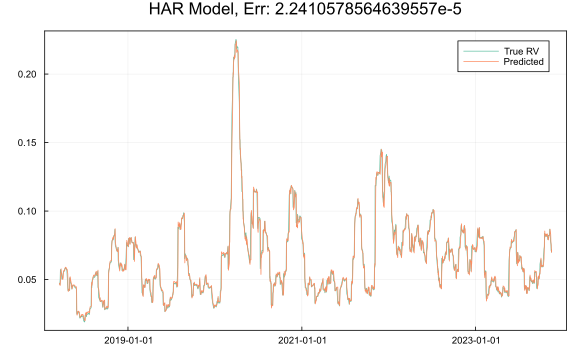

In [607]:
p1 = plot(df[23:end,:timestamp], data_har.rv_t, lab="True RV", leg=:topright, 
    title="HAR Model, Err: $(mean(abs2, data_har.rv_t - har_prediction))", palette=:Set2_3)
p1 = plot!(df[23:end,:timestamp], har_prediction, lab="Predicted")

### Optim

In [608]:
using Optim
using Distributions

In [609]:
first(data_har,5)

5×4 DataFrame
 Row │ rv_t       rv_d       rv_w       rv_m      
     │ Float64    Float64    Float64    Float64   
─────┼────────────────────────────────────────────
   1 │ 0.0473428  0.0482018  0.0499451  0.0779071
   2 │ 0.0468346  0.0473428  0.0490958  0.0756935
   3 │ 0.046343   0.0468346  0.0485333  0.0734122
   4 │ 0.0499501  0.046343   0.0477621  0.0710546
   5 │ 0.0573562  0.0499501  0.0477344  0.06885

In [610]:
# Optimize
result = optimize(params -> har_model(params, data_har), [0.1, 0.1, 0.1, 0.1], LBFGS())

# Extract the estimated parameters
estimated_params = result.minimizer

4-element Vector{Float64}:
  0.0018357706116299386
  1.100211332995828
 -0.08433154079618557
 -0.043896855270166533

In [611]:
features = select(data_har, [:rv_d, :rv_w, :rv_m])
predicted_volatility = predict_har(estimated_params, features)
first(predicted_volatility, 5)

5-element Vector{Float64}:
 0.047236084585474646
 0.04645985533538366
 0.046048234124564456
 0.04567591527637153
 0.04974360890224319

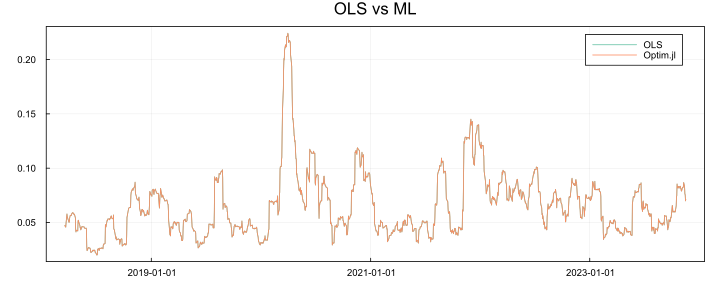

In [612]:
p2 = plot(df[23:end,:timestamp], har_prediction, lab="OLS", leg=:topright, 
    title="OLS vs ML", palette=:Set2_3)
p2 = plot!(df[23:end,:timestamp],predicted_volatility, lab="Optim.jl", size=(1000,400))

-------

### Flux

In [613]:
using Plots, Plots.Measures
gr(; fmt = "svg", dpi=72, fontfamily="Arial", framestyle=:box, size=(500 * 1.618, 500), thickness_scaling = 1.1, palette=:seaborn_colorblind, margin=3mm)

Plots.GRBackend()

In [614]:
using Flux
using Flux: params, mse, gradient, update!

In [615]:
rv_pfe = df.rv

1451-element Vector{Float64}:
 0.09604381231113285
 0.09702239689470026
 0.09820962442225946
 0.09845265176896163
 0.09865374428882463
 0.09861021426214125
 0.09933359904745971
 0.09054407459917806
 0.09088334308597633
 0.086199904169154
 ⋮
 0.08232085875573923
 0.08345910684357745
 0.08673349449885137
 0.08335326232361459
 0.07733658683233961
 0.07632329300121664
 0.07112648348451285
 0.07215152081578978
 0.07004524728479532

In [616]:
predictors = HAR_regressors(rv_pfe)
target = rv_pfe[23:end]
size(predictors), size(target)

((1429, 3), (1429,))

In [617]:
beta_har = OLSestimatorconst(target, predictors)

4-element Vector{Float64}:
  0.001835770612281041
  1.100211332833513
 -0.084331540609208
 -0.043896855304742785

In [618]:
yhat_har = permutedims(beta_har[2:end]' * predictors');

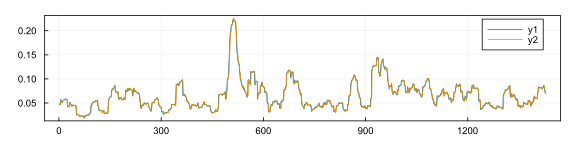

In [619]:
plt_data = plot(target; size=(800,200))
plt_data = plot!(predictors[:,1])

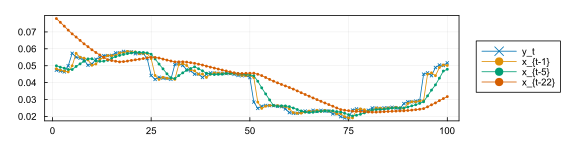

In [620]:
plt_data = plot(target[1:100]; label="y_t",  m=(2,:x), msw=0, size=(800,200), legend=:outerright)
plt_data = plot!(predictors[1:100,1]; label="x_{t-1}", m=(2), msw=0)
plt_data = plot!(predictors[1:100,2]; label="x_{t-5}", m=(2), msw=0)
plt_data = plot!(predictors[1:100,3]; label="x_{t-22}", m=(2), msw=0)

In [621]:
xtrain = predictors[1:1140,:] |> permutedims .|> Float32
ytrain = target[1:1140] |> permutedims .|> Float32
xvalid = predictors[1141:1429,:] |> permutedims .|> Float32
yvalid = target[1141:1429] |> permutedims .|> Float32;

Reshaping because:

- sequences of matrices = Vector of Matrices [[features x batchsize] x time], or
- 3D arrays [features x batchsize x time]
- put data into model in sequence:
    1. `[model(xt) for xt in sequence of matrices]` # maintains the order of time series
    2. `model(3D_array)` # flux knows what to do, actually does the above

In [622]:
xt_rnn = reshape(xtrain, 3, 1, :)
yt_rnn = reshape(ytrain, 1, 1, :)
xv_rnn = reshape(xvalid, 3, 1, :)
yv_rnn = reshape(yvalid, 1, 1, :);

In [623]:
size(xtrain), size(ytrain)

((3, 1140), (1, 1140))

In [624]:
size(xt_rnn), size(yt_rnn)

((3, 1, 1140), (1, 1, 1140))

In [625]:
using StatsBase

standardization of data:

In [626]:
fit_xt = StatsBase.fit(UnitRangeTransform, sqrt.(xtrain); dims=2)
fit_xv = StatsBase.fit(UnitRangeTransform, sqrt.(xvalid); dims=2)
fit_yt = StatsBase.fit(UnitRangeTransform, sqrt.(ytrain); dims=2)
fit_yv = StatsBase.fit(UnitRangeTransform, sqrt.(yvalid); dims=2)

UnitRangeTransform{Float32, Vector{Float32}}(1, 2, true, Float32[0.19009078], Float32[9.134706])

In [627]:
xt_std = StatsBase.transform(fit_xt, sqrt.(xtrain))
xv_std = StatsBase.transform(fit_xv, sqrt.(xvalid))
yt_std = StatsBase.transform(fit_yt, sqrt.(ytrain))
yv_std = StatsBase.transform(fit_yv, sqrt.(yvalid))

1×289 Matrix{Float32}:
 0.646701  0.645528  0.626206  0.505555  …  0.699762  0.717253  0.681174

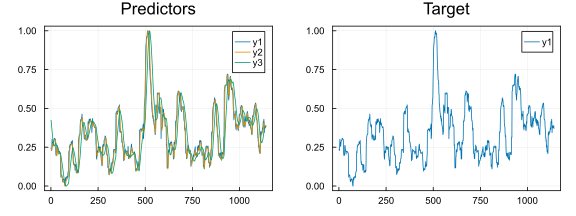

In [628]:
plot(plot(xt_std', title="Predictors"), plot(yt_std', title="Target"), size = (800,300))

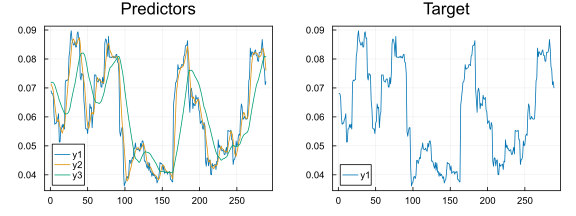

In [629]:
plot(plot(reshape(xv_rnn,3,:)', title="Predictors"), plot(yv_rnn|>vec, title="Target"), size = (800,300))

In [630]:
xt_rnn = reshape(xt_std, 3, 1, :)
yt_rnn = reshape(yt_std, 1, 1, :)
xv_rnn = reshape(xv_std, 3, 1, :)
yv_rnn = reshape(yv_std, 1, 1, :);

In [631]:
mo1, mb1, lt1, lv1 = trainW4(xt_rnn, yt_rnn, xv_rnn, yv_rnn; nodes=[50,30], eta=0.0001,
    n_epochs=200, verbose=30, maxpatience=20, drop=0.1f0, lambdaW=0.0001f0);

Epoch [1/200] 	 Training Loss 0.12 	 Validation Loss 0.27


Epoch [31/200] 	 Training Loss 0.02 	 Validation Loss 0.07


Epoch [61/200] 	 Training Loss 0.01 	 Validation Loss 0.05
  ⊚ Counted +1 in patience, 1/20 	 Epoch: 62


  ⊚ Counted +1 in patience, 2/20 	 Epoch: 63
  ⊚ Counted +1 in patience, 3/20 	 Epoch: 64


  ⊚ Counted +1 in patience, 4/20 	 Epoch: 65
  ⊚ Counted +1 in patience, 5/20 	 Epoch: 66


  ⊚ Counted +1 in patience, 6/20 	 Epoch: 67
  ⊚ Counted +1 in patience, 7/20 	 Epoch: 68


  ⊚ Counted +1 in patience, 8/20 	 Epoch: 69
  ⊚ Counted +1 in patience, 9/20 	 Epoch: 70


  ⊚ Counted +1 in patience, 10/20 	 Epoch: 71
  ⊚ Counted +1 in patience, 11/20 	 Epoch: 72


  ⊚ Counted +1 in patience, 12/20 	 Epoch: 73
  ⊚ Counted +1 in patience, 13/20 	 Epoch: 74


  ⊚ Counted +1 in patience, 14/20 	 Epoch: 75
  ⊚ Counted +1 in patience, 15/20 	 Epoch: 76


  ⊚ Counted +1 in patience, 16/20 	 Epoch: 77
  ⊚ Counted +1 in patience, 17/20 	 Epoch: 78
  ⊚ Counted +1 in patience, 18/20 	 Epoch: 79


  ⊚ Counted +1 in patience, 19/20 	 Epoch: 80
  ⊚ Counted +1 in patience, 20/20 	 Epoch: 81
 □ Epoch 81 	 Patience is LOST :) 


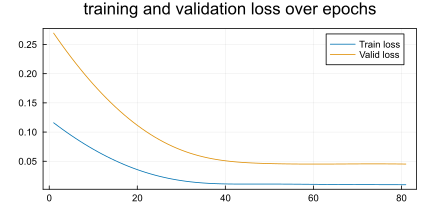

In [632]:
plot([lt1 lv1], labels=["Train loss" "Valid loss"], size=(600,300), title = "training and validation loss over epochs")

In [633]:
Flux.reset!(mo1) # reset hidden
mo1(xt_rnn) # warm-up model
yhat_mo1_valid = mo1(xv_rnn) |> vec;

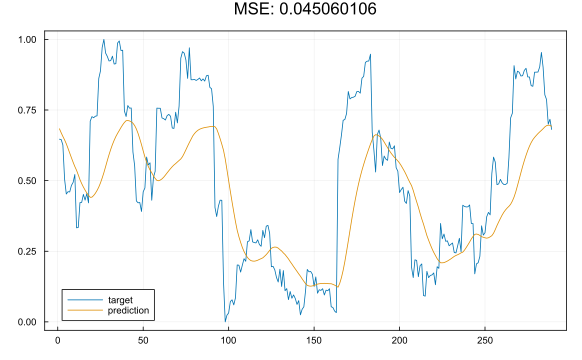

In [634]:
pred_fit = mo1(xv_rnn)
plt_vld = plot(yv_rnn |> vec; label="target")
plt_vld = plot!(pred_fit |> vec; label="prediction", title="MSE: $(Flux.mse(pred_fit, yv_rnn))")

In [635]:
beta_har = OLSestimatorconst(yt_std', xt_std')

4×1 Matrix{Float64}:
  0.006403042556866233
  1.0935009130002054
 -0.07753627036738878
 -0.03599729881559003

In [636]:
yhat_beta = [ones(size(xv_std',1)) xv_std'] * beta_har;

In [637]:
Flux.mse(yhat_beta, yv_std')

0.005304953206757161

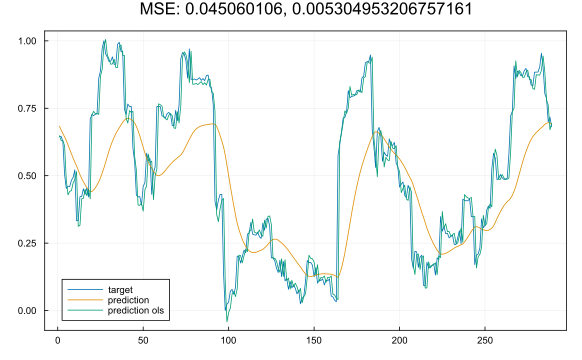

In [638]:
pred_fit = mo1(xv_rnn)
plt_vld = plot(yv_rnn |> vec; label="target")
plt_vld = plot!(pred_fit |> vec; label="prediction", title="MSE: $(Flux.mse(pred_fit, yv_rnn)), $(Flux.mse(yhat_beta, yv_rnn[:]))")
plt_vld = plot!(yhat_beta; label="prediction ols")

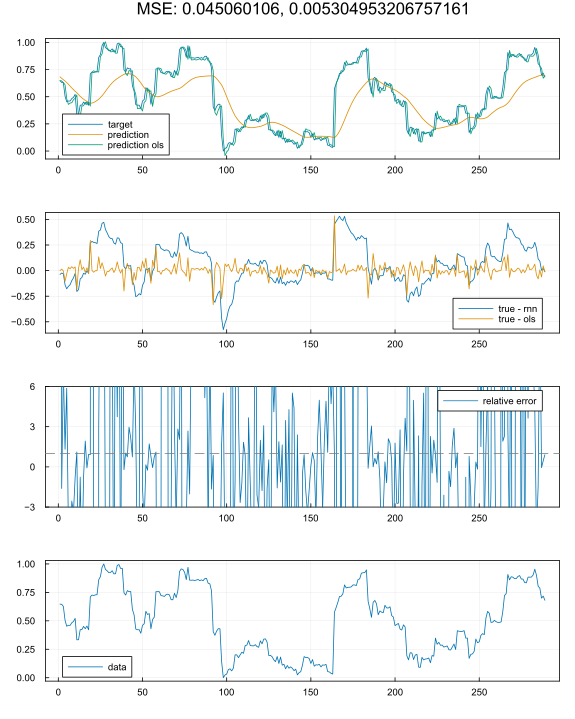

In [639]:
px1 = plot(yv_rnn[:] .- pred_fit[:], label="true - rnn")
px1 = plot!(yv_rnn[:]  .- yhat_beta, label="true - ols")
#plot!(pred_fit[:] .- yhat_beta, label="rnn - ols")
px2 = plot((yv_rnn[:] .- pred_fit[:]) ./ (yv_rnn[:]  .- yhat_beta), ylim=(-3,6), label="relative error")
px2 = hline!([1], line=(1,:dash,:grey), label="")
px3 = plot(yv_rnn[:], label="data")
plot(plt_vld, px1, px2, px3, layout=(4,:), size=(800,1000))

In [640]:
ksplits = 4
idx_t = collect(1:1000)
valid_ratio = 0.3
train_valid_split_size = div(idx_t[end], ksplits)

250

In [641]:
valid_size = floor(Int, train_valid_split_size * valid_ratio)

75

In [642]:
train_size = train_valid_split_size - valid_size

175

In [643]:
# train and valid overlap from previous folds
[((1 + i*train_size):(train_size + i * train_size), (train_size + 1 + i*train_size):(train_size + valid_size + i * train_size)) for i in 0:4]

5-element Vector{Tuple{UnitRange{Int64}, UnitRange{Int64}}}:
 (1:175, 176:250)
 (176:350, 351:425)
 (351:525, 526:600)
 (526:700, 701:775)
 (701:875, 876:950)

In [644]:
[
    ((1 + i*(train_size+valid_size)):(train_size + i*(train_size+valid_size)), 
    (train_size + 1 + i*(train_size+valid_size)):(valid_size + train_size + i*(train_size+valid_size))) for i in 0:3
]

4-element Vector{Tuple{UnitRange{Int64}, UnitRange{Int64}}}:
 (1:175, 176:250)
 (251:425, 426:500)
 (501:675, 676:750)
 (751:925, 926:1000)

In [645]:
# how push! and append! functions work:
a = Float64[]
b = []
@time for i in 1:4
    push!(a, i)
    append!(b, i)
end

  0.000016 seconds (2 allocations: 160 bytes)


In [646]:
a, b

([1.0, 2.0, 3.0, 4.0], Any[1, 2, 3, 4])

In [661]:
n_ensembles = 5
arr_models = []
ens_loss_t = []
ens_loss_v = []
for iens in 1:n_ensembles
    println("> Running ensemble $iens")
    @time mo0, mb0, lt0, lv0 = trainW4(xt_rnn, yt_rnn, xv_rnn, yv_rnn; nodes=[10,30], eta=0.0001, n_epochs=200, 
        verbose=1, maxpatience=30, drop=0.1, lambdaW=0.00003f0)
    # _ saving
    push!(arr_models, mb0) # saving the best model for each ensemble
    push!(ens_loss_t, lt0)
    push!(ens_loss_v, lv0)
end

> Running ensemble 1


Epoch [200/200] 	 Training Loss 0.03 	 Validation Loss 0.11
  4.499701 seconds (30.86 M allocations: 6.274 GiB, 21.50% gc time)
> Running ensemble 2


Epoch [200/200] 	 Training Loss 0.02 	 Validation Loss 0.1
  4.416616 seconds (30.86 M allocations: 6.274 GiB, 21.59% gc time)
> Running ensemble 3


Epoch [200/200] 	 Training Loss 0.01 	 Validation Loss 0.06
  4.365356 seconds (30.86 M allocations: 6.274 GiB, 21.35% gc time)
> Running ensemble 4


Epoch [200/200] 	 Training Loss 0.02 	 Validation Loss 0.09
  4.268062 seconds (30.86 M allocations: 6.274 GiB, 20.96% gc time)
> Running ensemble 5


Epoch [200/200] 	 Training Loss 0.04 	 Validation Loss 0.15
  4.458534 seconds (30.86 M allocations: 6.274 GiB, 21.02% gc time)


In [648]:
arr_models

3-element Vector{Any}:
 Chain(Recur(LSTMCell(3 => 10)), Dropout(0.1), Dense(10 => 30), Dropout(0.1), Dense(30 => 1))  # 941 parameters, plus 20 non-trainable
 Chain(Recur(LSTMCell(3 => 10)), Dropout(0.1), Dense(10 => 30), Dropout(0.1), Dense(30 => 1))  # 941 parameters, plus 20 non-trainable
 Chain(Recur(LSTMCell(3 => 10)), Dropout(0.1), Dense(10 => 30), Dropout(0.1), Dense(30 => 1))  # 941 parameters, plus 20 non-trainable

In [649]:
m_pars = Flux.params(arr_models[1]) |> collect .|> vec

9-element Vector{Vector{Float32}}:
 [-0.27378535, -0.19683215, -0.33818257, 0.34478423, -0.05444356, 0.2248268, -0.27939945, 0.049356803, -0.32167196, -0.13101909  …  -0.011903714, 0.23208413, -0.13948971, -0.076947585, -0.31455925, 0.22737105, -0.18758467, -0.3583769, -0.18564896, -0.34363937]
 [-0.020567158, 0.3116062, 0.0020641584, -0.28406045, -0.24491669, -0.17098267, 0.07034848, 0.15691887, 0.122667775, 0.10860489  …  0.16799682, 0.034937896, -0.04093318, -0.106283605, -0.28509122, -0.046416037, 0.17624158, 0.20324957, -0.051745795, -0.025794396]
 [0.0077026878, 0.017973844, -0.009600073, 0.011457101, -0.010233644, 0.01222388, -0.008844312, -0.01019604, -0.010088341, 0.012691409  …  0.008873123, 0.017893098, -0.009489409, 0.012902212, -0.010221665, 0.013761734, -0.008956092, -0.010622356, -0.0098745255, 0.0138654215]
 [0.013891702, -0.015685584, -0.0151372645, -0.016803207, -0.01530808, 0.014566227, 0.014732348, -0.010584434, -0.011716601, 0.017064184]
 [0.013662602, -0.016330753

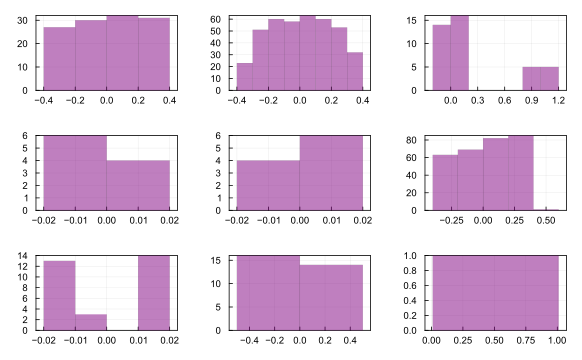

In [650]:
plot(histogram.(m_pars)..., line=(0), fill=(1, 0.5, :purple), legend=:none)

In [651]:
yhat_array = []
for m in arr_models
    Flux.reset!(m) # reset model
    m(xt_rnn) # warm-up the model for time step prior prediction
    push!(yhat_array, m(xv_rnn))
end

In [652]:
yhat_ensemble = mean(yhat_array) |> vec;

In [653]:
size(xtrain), size(ytrain)

((3, 1140), (1, 1140))

In [654]:
har_coefs = OLSestimatorconst(yt_std', xt_std')
yhat_har_valid = (xv_std' * har_coefs[2:end]) .+ har_coefs[1];

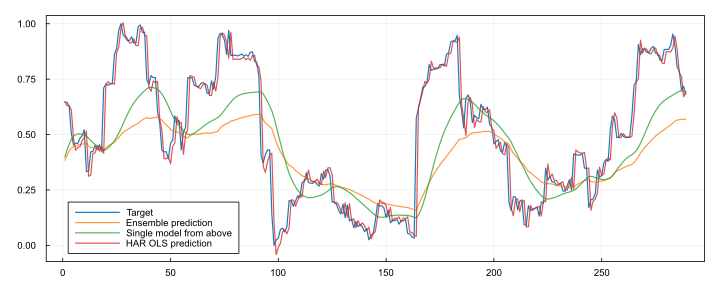

In [655]:
plot(yv_rnn |> vec, label="Target", size=(1000,400), framestyle=:box, line=(1.5, 1.0, :solid), palette=:tab10)
plot!(yhat_ensemble, label="Ensemble prediction", line=(1.5, 0.8, :solid))
plot!(yhat_mo1_valid, label="Single model from above", line=(1.5, 0.8, :solid))
plot!(yhat_har_valid, label="HAR OLS prediction", line=(1.5, 0.8, :solid))

In [656]:
println(" HAR: ", Flux.mse(yhat_har_valid, yv_rnn |> vec), "\n",
    " Ens: ", Flux.mse(yhat_ensemble, yv_rnn |> vec), "\n",
    " M1:  ", Flux.mse(yhat_mo1_valid, yv_rnn |> vec), "\n")

 HAR: 0.005304953206757161
 Ens: 0.058867674
 M1:  0.04517288



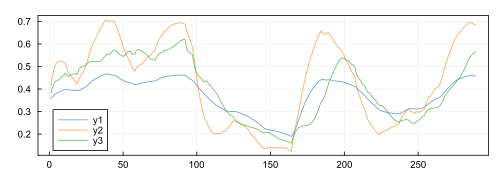

In [657]:
# plot individual predictions
plot(yhat_array .|> vec, framestyle=:box, line=(1, 0.7, :solid), palette=:tab10, size=(700,250))

In [660]:
Pkg.activate()

  Activating project at `~/.julia/environments/v1.9`
